### This pipe follows the following pipeline
- split dataset into train/test/valid sets
- preprocess each set into spacy format
- train spacy model
- evaluate model on unseen test set
- make predictions on a string of text
- compare predicted and true labels on test set

### Split dataset

In [6]:
# split dataset into train/test/valid sets
from _1_split_dataset import split_dataset
train_X, train_y, test_X, test_y, valid_X, valid_y = split_dataset('../consumer_complaints.csv',
                                                                  n_rows=10000)


Reading data..


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):



Selected 10000 rows of dataset

Splitting dataset in train and test sets..

Shape of train_X: (7225,)
Shape of train_y: (7225,)

Shape of test_X: (1500,)
Shape of test_y: (1500,)

Shape of valid_X: (1275,)
Shape of valid_y: (1275,)

Text split complete for preprocessing


### Preprocess

In [10]:
# Preprocess train data
from _2_preprocess_series import preprocess_series
train_label_values, train_data, train_texts, train_labels = preprocess_series(train_X, 
                                                                              train_y)


Cleaning text..

Text cleaning complete

Number of labels: 11
['Consumer Loan', 'Credit card', 'Bank account or service', 'Mortgage', 'Debt collection', 'Credit reporting', 'Student loan', 'Money transfers', 'Prepaid card', 'Other financial service', 'Payday loan']

Converting data to spacy format

Data is now ready to be trained


In [12]:
# Preprocess test data
test_label_values, test_data, test_text, test_labels = preprocess_series(test_X, 
                                                                         test_y)


Cleaning text..

Text cleaning complete

Number of labels: 11
['Mortgage', 'Credit card', 'Debt collection', 'Bank account or service', 'Credit reporting', 'Consumer Loan', 'Student loan', 'Money transfers', 'Prepaid card', 'Payday loan', 'Other financial service']

Converting data to spacy format

Data is now ready to be trained


In [14]:
# Preprocess valid data
valid_label_values, valid_data, valid_texts, valid_labels = preprocess_series(valid_X, 
                                                                              valid_y)


Cleaning text..

Text cleaning complete

Number of labels: 11
['Credit reporting', 'Debt collection', 'Prepaid card', 'Mortgage', 'Credit card', 'Consumer Loan', 'Bank account or service', 'Student loan', 'Money transfers', 'Payday loan', 'Other financial service']

Converting data to spacy format

Data is now ready to be trained


### Train

In [15]:
# train and validate spacy model on the split dataset
from _5_train_spacy import train_spacy
train_spacy(train_label_values, 
            train_data, 
            valid_texts, 
            valid_labels, 
            1, 
            'ensemble',
           0.3,
           3e-3,
           'test_model')


Model loading complete

Training the model..

Iteration: 1
                         precision    recall  f1-score   support

Bank account or service       0.60      0.78      0.68       105
          Consumer Loan       0.44      0.35      0.39        79
            Credit card       0.63      0.75      0.69       149
       Credit reporting       0.86      0.72      0.78       238
        Debt collection       0.80      0.83      0.82       340
        Money transfers       0.00      0.00      0.00        12
               Mortgage       0.84      0.97      0.90       280
Other financial service       0.00      0.00      0.00         2
            Payday loan       0.00      0.00      0.00        15
           Prepaid card       0.00      0.00      0.00        16
           Student loan       0.79      0.49      0.60        39

               accuracy                           0.76      1275
              macro avg       0.45      0.45      0.44      1275
           weighted avg     

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Evaluate


Model loading complete
Normalized confusion matrix


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

Bank account or service       0.62      0.73      0.67       123
          Consumer Loan       0.45      0.31      0.37        93
            Credit card       0.61      0.75      0.68       176
       Credit reporting       0.87      0.80      0.83       280
        Debt collection       0.80      0.80      0.80       400
        Money transfers       0.00      0.00      0.00        13
               Mortgage       0.84      0.97      0.90       330
Other financial service       0.00      0.00      0.00         2
            Payday loan       0.00      0.00      0.00        18
           Prepaid card       0.00      0.00      0.00        19
           Student loan       0.69      0.52      0.59        46

               accuracy                           0.76      1500
              macro avg       0.44      0.44      0.44      1500
           weighted avg       0.73      0.76      0.74      1500



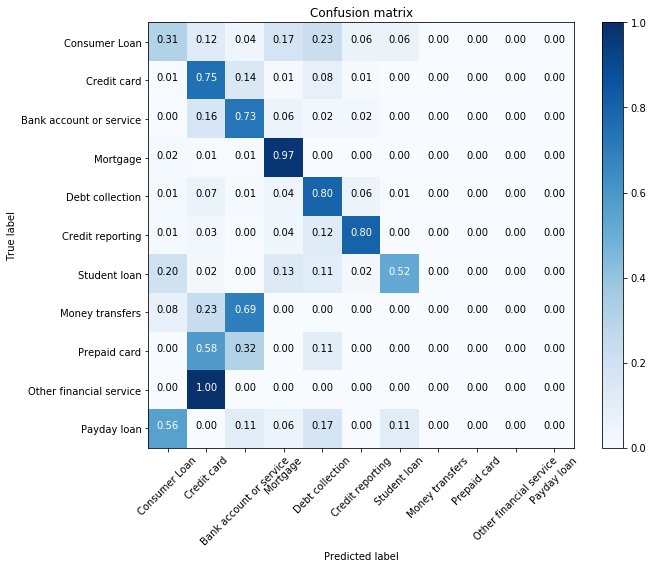

In [17]:
from _6_evaluate import evaluate
evaluate(test_text, test_labels, 'test_model', train_label_values)

### Make predictions

In [24]:
# Input random text and the mode outputs the predicted label
from _7_make_predictions import make_predictions, comp_pred
make_predictions('test_model', test_text[100])


The model predicts: Credit reporting


In [28]:
t = 'i want to complain about an unknown charge on my credit card i never used my card at such an establishment'
make_predictions('test_model', t)


The model predicts: Credit card


In [23]:
# Can be used if labels are available to compare predicted and true labels
comp_pred('test_model', test_text, test_labels, 100)

Text:
 listed credit report collections account account needs deleted credit report immediately flagrantly listing wrong information credit report include payments made correct balance dates payments information listed credit report wrong accounts need deleted credit report contain wrong information flagrant violation fair credit reporting act

The true label is: Credit reporting

The model predicts: Credit reporting


In [27]:
comp_pred('test_model', test_text, test_labels, 1000)

Text:
 year continue recieve multiple telephone calls daily basis portfolio recovery seeking persons know affiliation live residence informed portfolio recovery numerous times wrong number perhaps people attempting contact telephone number however continue recieve multiple daily calls company one point someone also called cell phone asking persons also provided sensitive information person seeking

The true label is: Debt collection

The model predicts: Debt collection
